In [28]:
import scraping_class
logfile = 'log.txt'## name your log file.
connector = scraping_class.Connector(logfile)
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook

In [29]:
import pandas as pd
import numpy as np
import html5lib
import sys
import pickle
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from matplotlib import pyplot
import math
from math import isnan

In [30]:
with open('df_final-COPY1.pkl', 'rb') as f:
    df = pickle.load(f)

## Data Structuring to graphs and tables

#### Function for couting the categories

In [31]:
def tlen(name):
    tlen = pd.DataFrame()
    tlen_id = []
    tlen_value = []
    tlen_share = []
    for i in df[name].unique():
        tlen_id.append(i)
        tlen_value.append(len(df.loc[df[name] == i]))
        
    for i in df[name].unique():
        tlen_share.append((len(df.loc[df[name] == i])/sum(tlen_value)*100))
        
    tlen_id.append('Total')
    tlen_value.append(sum(tlen_value))
    tlen_share.append(sum(tlen_share))
        
        
    tlen['Id'] = tlen_id
    tlen['Value'] = tlen_value
    tlen['Share %'] = tlen_share
        
    return(tlen.sort_values('Value',ascending=True))

In [32]:
# Counting observation in one year
def tlen_year(name,year):
    df1 = df[df['Year'] == year]
    tlen = pd.DataFrame()
    tlen_id = []
    tlen_value = []
    tlen_share = []
    for i in df[name].unique():
        tlen_id.append(i)
        tlen_value.append(len(df1.loc[df[name] == i]))
    
    for i in df[name].unique():
        tlen_share.append((len(df1.loc[df[name] == i])/sum(tlen_value)*100))
        
    tlen_id.append('Total')
    tlen_value.append(sum(tlen_value))
    tlen_share.append(sum(tlen_share))
        
    tlen['Id'] = tlen_id
    tlen['Value'] = tlen_value
    tlen['Share %'] = tlen_share
        
    return(tlen.sort_values('Value',ascending=True))

In [33]:
# Counting var by year 
def tlen_byyear(name):
    
    tlen = pd.DataFrame()
    tlen_id = []
    tlen_1314 = []
    tlen_1415 = []
    tlen_1516 = []
    tlen_1617 = []
    tlen_1718 = []

    for i in df[name].unique():
        tlen_id.append(i)
        df1 = df[df['Year'] == '2013-2014']
        tlen_1314.append(len(df1.loc[df[name] == i]))
        df2 = df[df['Year'] == '2014-2015']
        tlen_1415.append(len(df2.loc[df[name] == i]))
        df3 = df[df['Year'] == '2015-2016']
        tlen_1516.append(len(df3.loc[df[name] == i]))
        df4 = df[df['Year'] == '2016-2017']
        tlen_1617.append(len(df4.loc[df[name] == i]))
        df5 = df[df['Year'] == '2017-2018']
        tlen_1718.append(len(df5.loc[df[name] == i]))
    
    
        
    tlen_id.append('Total')
    tlen_1314.append(sum(tlen_1314))
    tlen_1415.append(sum(tlen_1415))
    tlen_1516.append(sum(tlen_1516))
    tlen_1617.append(sum(tlen_1617))
    tlen_1718.append(sum(tlen_1718))
    
        
    tlen['Id'] = tlen_id
    tlen['2013-2014'] = tlen_1314
    tlen['2014-2015'] = tlen_1415
    tlen['2015-2016'] = tlen_1516
    tlen['2016-2017'] = tlen_1617
    tlen['2017-2018'] = tlen_1718
        
    return(tlen)

In [34]:
# Share of category by year
def tlen_byyear_share(name):
    
    tlen = pd.DataFrame()
    tlen_id = []
    tlen_1314 = []
    tlen_1415 = []
    tlen_1516 = []
    tlen_1617 = []
    tlen_1718 = []
    tlen_1314s = []
    tlen_1415s = []
    tlen_1516s = []
    tlen_1617s = []
    tlen_1718s = []

    for i in df[name].unique():
        tlen_id.append(i)
        df1 = df[df['Year'] == '2013-2014']
        tlen_1314.append(len(df1.loc[df[name] == i]))
        df2 = df[df['Year'] == '2014-2015']
        tlen_1415.append(len(df2.loc[df[name] == i]))
        df3 = df[df['Year'] == '2015-2016']
        tlen_1516.append(len(df3.loc[df[name] == i]))
        df4 = df[df['Year'] == '2016-2017']
        tlen_1617.append(len(df4.loc[df[name] == i]))
        df5 = df[df['Year'] == '2017-2018']
        tlen_1718.append(len(df5.loc[df[name] == i]))
    
    for i in df[name].unique():
        df1 = df[df['Year'] == '2013-2014']
        tlen_1314s.append(len(df1.loc[df[name] == i])/sum(tlen_1314))
        df2 = df[df['Year'] == '2014-2015']
        tlen_1415s.append(len(df2.loc[df[name] == i])/sum(tlen_1415))
        df3 = df[df['Year'] == '2015-2016']
        tlen_1516s.append(len(df3.loc[df[name] == i])/sum(tlen_1516))
        df4 = df[df['Year'] == '2016-2017']
        tlen_1617s.append(len(df4.loc[df[name] == i])/sum(tlen_1617))
        df5 = df[df['Year'] == '2017-2018']
        tlen_1718s.append(len(df5.loc[df[name] == i])/sum(tlen_1718))
        
    tlen['Id'] = tlen_id
    tlen['2013-2014'] = tlen_1314s
    tlen['2014-2015'] = tlen_1415s
    tlen['2015-2016'] = tlen_1516s
    tlen['2016-2017'] = tlen_1617s
    tlen['2017-2018'] = tlen_1718s
        
    return(tlen)

In [35]:
# Count group by variable
def tlen_bygroup(var, group):
    my_dict = {}
    for i in df[group].unique():
        list_value = []
        list_id = []
        for k in df[var].unique():
            df1 = df[df[group] == i]
            list_value.append(len(df1.loc[df[var] == k]))
            list_id.append(k)
        my_dict[i] = list_value
        
    my_dict['ID'] = list_id
    return(pd.DataFrame.from_dict(my_dict, orient='index').T.set_index('ID'))
        
            

In [36]:
#Calculate gpa when only passed exams are counted
snit = []
for i in range(0,len(df)):
    x_02 = df[2][i]
    x_04 = df[4][i]
    x_07 = df[7][i]
    x_10 = df[10][i]
    x_12 = df[12][i]
    
    number = (x_12,x_10,x_07,x_04,x_02)
    grades = [12,10,7,4,2]
    mydick = dict(zip(grades,number))
    cleandick = {k: mydick[k] for k in mydick if not isnan(mydick[k])}
    
    num = sum([x * y for x,y in mydick.items()])
    den = sum(mydick.values())
    
    snit.append(num/den)
    
df["Snit"] = snit

/Users/MagnusOrberg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in long_scalars


In [37]:
# Defining total passed grades 
df['bestået'] = df[2] + df[4] + df[7] + df[10] + df[12]

# Making nan to 0 and creating var for weighted GPA and contribute to weight
l = []
for i in range(len(df['bestået'])):
    if isnan(df['bestået'][i]):
        l.append(0)
    else:
        l.append(df['bestået'][i])

df['bestået'] = l        
df['Snit_w0'] = df['Snit']
l = []
for i in range(len(df['Snit_w0'])):
    if isnan(df['Snit_w0'][i]):
        l.append(0)
    else:
        l.append(df['Snit_w0'][i])
        
df['Snit_w0'] = l
df['W_snit'] = df['Snit_w0']*df['bestået']/sum(df['bestået'])
df['w_bestået'] = df['bestået']*df['Credit_edit']

In [38]:
# Generating Level_all dummies

l = []
for i in range(len(df['Bachelor'])):
    if df['Bachelor'][i] == 1:
        l.append(1)
    elif df['Bachelor choice'][i] == 1:
        l.append(1)
    else:
        l.append(0)

df['Bachelor_all'] = l

l = []
for i in range(len(df['Master'])):
    if df['Master'][i] == 1:
        l.append(1)
    elif df['Full Degree Master choice'][i] == 1:
        l.append(1)
    elif df['Full Degree Master'][i] == 1:
        l.append(1)
    else:
        l.append(0)

df['Master_all'] = l

In [39]:
# creating w_ mean function
def w_mean(categories):
    d = {}
    df_stat1 = pd.DataFrame()
    df_stat1[''] = ['Weighted mean'] 
    for i in categories:
        d[i] = df[df[i] == 1]
        df_stat1[i] = [sum(pd.DataFrame.from_dict(d[i])['W_snit']*sum(df['bestået'])/sum(pd.DataFrame.from_dict(d[i])['bestået']))]
    return(df_stat1)

In [40]:
# Generating Level_only dummies
Master_only = []
Bachelor_only = []
Both = []
Other = []
for i in range(len(df['Bachelor_all'])):
    if df['Bachelor_all'][i] == 1:
        if df['Master_all'][i] == 1:
            Both.append(1)
            Master_only.append(0)
            Bachelor_only.append(0)
            Other.append(0)
        elif df['Master_all'][i] == 0:
            Both.append(0)
            Master_only.append(0)
            Bachelor_only.append(1)
            Other.append(0)
        else:
            print('error', df['Level'][i])
    elif df['Bachelor_all'][i] == 0:
        if df['Master_all'][i] == 1:
            Both.append(0)
            Master_only.append(1)
            Bachelor_only.append(0)
            Other.append(0)
        elif df['Master_all'][i] == 0:
            Both.append(0)
            Master_only.append(0)
            Bachelor_only.append(0)
            Other.append(1)
        else:
            print('error', df['Level'][i])
    else: 
        print('error', df['Level'][i])

df['Master_only'] = Master_only
df['Bachelor_only'] = Bachelor_only
df['Both'] = Both
df['Other'] = Other
 
w_mean(['Master_all', 'Bachelor_all','Master_only','Bachelor_only','Both','Other']);

In [41]:
# Copied from Jens 
# We need to weight the grades according to ECTS points. If we do not small courses will have the same weight as
# bigger courses. 
df['Weigthed_m3'] = df['Credit_edit'] * df[-3]
df['Weigthed_00'] = df['Credit_edit'] * df[0]
df['Weigthed_02'] = df['Credit_edit'] * df[2]
df['Weigthed_4'] = df['Credit_edit'] * df[4]
df['Weigthed_7'] = df['Credit_edit'] * df[7]
df['Weigthed_10'] = df['Credit_edit'] * df[10]
df['Weigthed_12'] = df['Credit_edit'] * df[12]
df[['Credit_edit',-3,'Weigthed_m3',0,'Weigthed_00',2,'Weigthed_02',4,'Weigthed_4',7,'Weigthed_7',10,'Weigthed_10',12,'Weigthed_12']];




In [42]:
# Copied from Jens: Weighting the Level categories

y_inner = []
y = []
x = ['02','4','7','10','12']

# Looking at each faculty 
for i in ['Master_only','Bachelor_only','Both','Other']:
    df_level = df[df[i]==1]
   
    for k in ['Weigthed_02','Weigthed_4','Weigthed_7','Weigthed_10','Weigthed_12']:
        y_inner.append(df_level[k].sum(skipna = True)) 
    
    y.append(y_inner)
    y_inner=[]
    
y

# calc frequencies 
y_freq_inner = []
y_freq = []

# running through each faculty
for i in range(len(y)):
    
    # calc frequencies 
    for q in range(len(y[i])):
        y_freq_inner.append(y[i][q]/sum(y[i]))

    y_freq.append(y_freq_inner)
    y_freq_inner = []

#Number of grades given for each faculty. 
list_number_of_grades_faculties = []
for i in ['Master_only','Bachelor_only','Both','Other']:
    df_number_grades = df[df[i] == 1]
    list_number_of_grades_faculties.append(int(sum(df_number_grades[[12, 10, 7, 4, 2]].sum(skipna = True))))

list_number_of_grades_faculties

y_ects_freq = y_freq

In [43]:
#Generating var of Type of assesment with used categories
l = []
for i in range(len(df['Level'])):
    for k in ['Master_only','Bachelor_only','Both','Other']:
        if df[k][i] == 1:
            l.append(k)
df['Level_edit'] = l

l = []
for i in range(len(df['Type of assessmet_edit'])):
        if df['Type of assessmet_edit'][i] == 'Oral':
            l.append('Oral')
        elif df['Type of assessmet_edit'][i] == 'Written not under invigilation':
            l.append('Written not under invigilation')
        elif df['Type of assessmet_edit'][i] == 'Written under invigilation':
            l.append('Written under invigilation')
        else:
            l.append('Rest')
df['toa_edit'] = l
df[['toa_edit','Type of assessmet_edit']];
#tlen_bygroup_weight('toa_edit','Level_edit')

In [44]:
# function with weights 
def tlen_bygroup_weight(var, group):
    my_dict = {}
    for i in df[group].unique():
        list_value = []
        list_id = []
        for k in df[var].unique():
            df1 = df[df[group] == i]
            list_value.append(sum(df1[df[var] == k]['bestået']))
            list_id.append(k)
        my_dict[i] = list_value
        
    my_dict['ID'] = list_id
    return(pd.DataFrame.from_dict(my_dict, orient='index').T.set_index('ID'))

In [45]:
# Function with ECTS weights 
def tlen_bygroup_weight_ects(var, group):
    my_dict = {}
    for i in df[group].unique():
        list_value = []
        list_id = []
        for k in df[var].unique():
            df1 = df[df[group] == i]
            list_value.append(sum(df1[df[var] == k]['w_bestået']))
            list_id.append(k)
        my_dict[i] = list_value
        
    my_dict['ID'] = list_id
    return(pd.DataFrame.from_dict(my_dict, orient='index').T.set_index('ID'))

In [46]:
# Function calculating mean
def w_mean_g(categories, group):
    d = {}
    df_stat1 = pd.DataFrame()
    
    for i in categories:
        l = []
        for k in group:
            df1 = df[df['toa_edit'] == k]
            d[i] = df1[df1[i] == 1]
            l.append(sum(pd.DataFrame.from_dict(d[i])['W_snit']*sum(df['bestået'])/sum(pd.DataFrame.from_dict(d[i])['bestået'])))   
        df_stat1[''] = group
        df_stat1[i] = l
        
        
    return(df_stat1)


w_mean_g(['Bachelor_only','Master_only'], df['toa_edit'].unique()).set_index('');



In [47]:
tlen('Institut')

,Id,Value,Share %
22,NaN,0,0.000000
54,Institut for Produktionsdyr og Heste,2,0.016132
53,Juridisk Masteruddannelse i Konfliktmægling,3,0.024197
48,Institut for Veterinær Sygdomsbiologi,4,0.032263
50,Miljøkemi og sundhed,5,0.040329
51,Masteruddannelse i hovedpinesygdomme,5,0.040329
52,Master i International Health (MA),7,0.056461
41,Institut for Farmaci,10,0.080658
47,Juridisk Diplomuddannelse i Krimonologi,10,0.080658
43,Institut for Lægemiddeldesign og Farmakologi,15,0.120987


### Output to Report

In [20]:
# Generating table for Censorship

df2 = df[df['Type of assessmet_edit'] == 'Oral' ]
df_nocen = df[df['Censorship form_edit'] == 'No external censorship']
df_cen = df[df['Censorship form_edit'] == 'External censorship']



df_stat1 = pd.DataFrame()
df_stat1[''] = ['Weighted mean'] 
df_stat1['External censorship'] = [sum(df_cen['W_snit']*sum(df['bestået'])/sum(df_cen['bestået']))]
df_stat1['No external censorship'] = [sum(df_nocen['W_snit']*sum(df['bestået'])/sum(df_nocen['bestået']))]
print(df_stat1.set_index('').to_latex())

\begin{tabular}{lrr}
\toprule
{} &  External censorship &  No external censorship \\
              &                      &                         \\
\midrule
Weighted mean &             7.634352 &                7.762438 \\
\bottomrule
\end{tabular}



#### Table. Disribution of year and faculty

In [21]:
print(tlen_byyear('Fakultet').to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
                                       Id &  2013-2014 &  2014-2015 &  2015-2016 &  2016-2017 &  2017-2018 \\
\midrule
 Det Natur- og Biovidenskabelige Fakultet &        519 &       1161 &       1205 &       1185 &       1207 \\
      Det Samfundsvidenskabelige Fakultet &        225 &        456 &        534 &        497 &        513 \\
                Det Humanistiske Fakultet &        212 &        421 &        758 &        341 &        244 \\
      Det Sundhedsvidenskabelige Fakultet &        238 &        651 &        637 &        672 &        671 \\
                   Det Juridiske Fakultet &        117 &        269 &        310 &        288 &        280 \\
                  Det Teologiske Fakultet &         35 &         82 &         83 &         86 &         87 \\
                                    Total &       1346 &       3040 &       3527 &       3069 &       3002 \\
\bottomrule
\end{tabular}



#### List of categories we've made

In [22]:
cat_list = ['Aid_edit', 'Marking scale_edit', 'Censorship form_edit', 'Duration_edit', 'Language_edit', 'Type of assessmet_edit']
di = {}
list_1 = []
for i in cat_list:
    list_1 = []
    for k in df[i].unique():
        list_1.append(k)
    di[i]=list_1
print(pd.DataFrame.from_dict(di, orient='index').T.to_latex(index=False))

\begin{tabular}{llllll}
\toprule
                  Aid\_edit &       Marking scale\_edit &    Censorship form\_edit &        Duration\_edit & Language\_edit &            Type of assessmet\_edit \\
\midrule
                       nan &    7-point grading scale &  No external censorship &              1 block &       English &    Continuous assessment not exam \\
          All aids allowed &                      nan &     External censorship &           1 semester &        Danish &                              Oral \\
 Only certain aids allowed &        passed/not passed &                     nan &  Other/Not specified &         Other &    Written not under invigilation \\
      Written aids allowed &  completed/not completed &                    None &             2 blocks &          None &                         Portfolio \\
              Without aids &       Without assessment &                    None &                 None &          None &        Written under invigilation \\
    

#### Graph for cecnsorship 

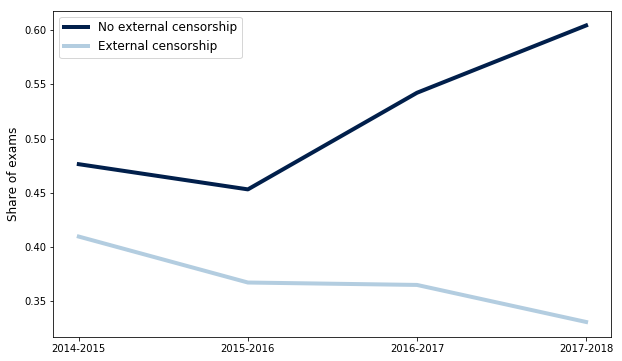

In [23]:
f, axs = plt.subplots(figsize=(10,6))
graph_df = tlen_byyear_share('Censorship form_edit').set_index('Id').T.reset_index()


plt.plot(graph_df['index'][1:],graph_df['No external censorship'][1:],label = 'No external censorship',color = "#011f4b", linewidth=4.0)
plt.plot(graph_df['index'][1:],graph_df['External censorship'][1:],label = 'External censorship',color = "#b3cde0", linewidth=4.0)


plt.legend(loc='best', fontsize = 12)
plt.ylabel('Share of exams',fontsize = 12)
plt.show()
f.savefig('mag3_Censorship_year.png')

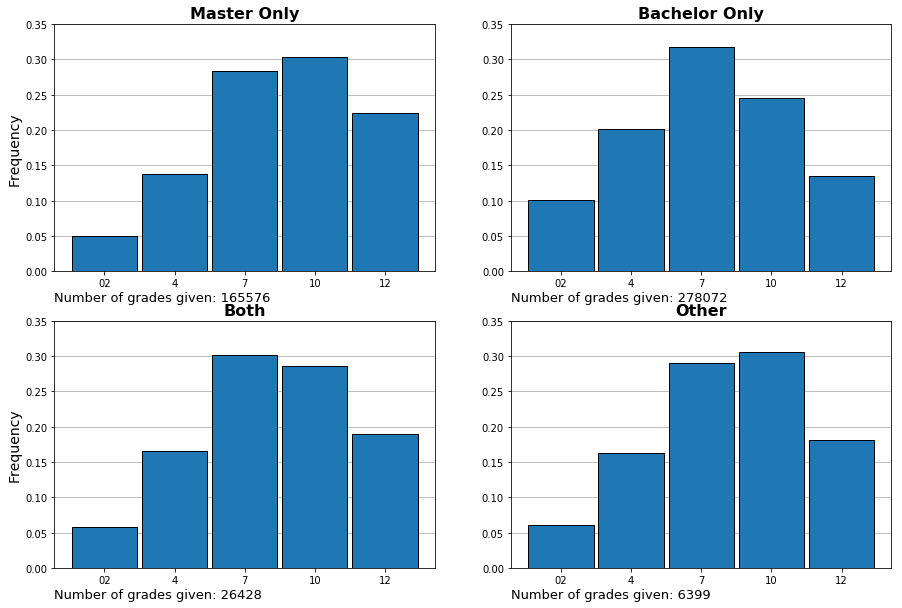

In [24]:
# Historgram of distributions by level
Faculty_names = ['Master Only','Bachelor Only','Both','Other']

f, ax = plt.subplots(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.title(Faculty_names[0], fontsize = 16, weight = 'bold')
plt.ylim([0,0.35])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.annotate('Number of grades given: '+ str(list_number_of_grades_faculties[0]), (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x, y_ects_freq[0], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 2, 2)
plt.title(Faculty_names[1], fontsize = 16, weight = 'bold')
plt.ylim([0,0.35])
plt.grid(axis ='y',zorder=0)
plt.annotate('Number of grades given: '+ str(list_number_of_grades_faculties[1]), (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x, y_ects_freq[1], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 2, 3)
plt.title(Faculty_names[2], fontsize = 16, weight = 'bold')
plt.ylim([0,0.35])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.annotate('Number of grades given: '+ str(list_number_of_grades_faculties[2]), (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x, y_ects_freq[2], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 2, 4)
plt.title(Faculty_names[3], fontsize = 16, weight = 'bold')
plt.ylim([0,0.35])
plt.grid(axis ='y',zorder=0)
plt.annotate('Number of grades given: '+ str(list_number_of_grades_faculties[3]), (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x, y_ects_freq[3], width=0.93, edgecolor='black',zorder=3)

f.savefig('histogram_grades_split_Level_ECTS_weight.png')

/Users/MagnusOrberg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/MagnusOrberg/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


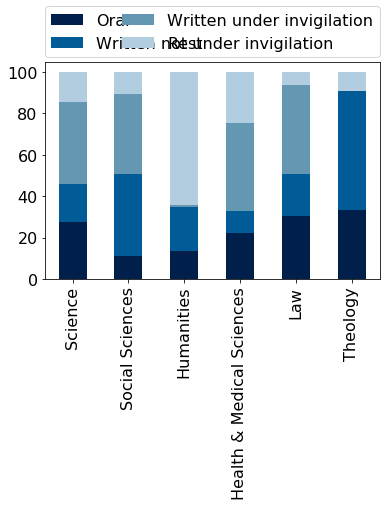

In [25]:
#Diagram of type of assessment
colors = ["#011f4b","#005b96","#6497b1",'#b3cde0']

d = tlen_bygroup_weight('toa_edit','Fakultet')
di = {}
di['ID'] = ['Rest', 'Oral', 'Written not under invigilation', 'Written under invigilation']
for i in d.columns.unique():
    l = []
    for k in range(len(d['Det Natur- og Biovidenskabelige Fakultet'])):
        l.append(d[i][k]/sum(d[i])*100)
    
    di[i] = l
    
dfcat = pd.DataFrame.from_dict(di).set_index('ID') 
dfcat = dfcat.rename(columns ={'Det Natur- og Biovidenskabelige Fakultet':'Science','Det Samfundsvidenskabelige Fakultet':'Social Sciences','Det Humanistiske Fakultet':'Humanities','Det Sundhedsvidenskabelige Fakultet':'Health & Medical Sciences','Det Juridiske Fakultet':'Law','Det Teologiske Fakultet':'Theology'}).T[['Oral', 'Written not under invigilation', 'Written under invigilation','Rest']]
dfcat;

dfcat.plot(kind='bar', stacked=True, color = colors, fontsize = 16)
#plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.rcParams["figure.figsize"] = [10,10]
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=2, fontsize = 16) #,weight = 'bold')
plt.tight_layout()
plt.savefig('mag_4.png')

/Users/MagnusOrberg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


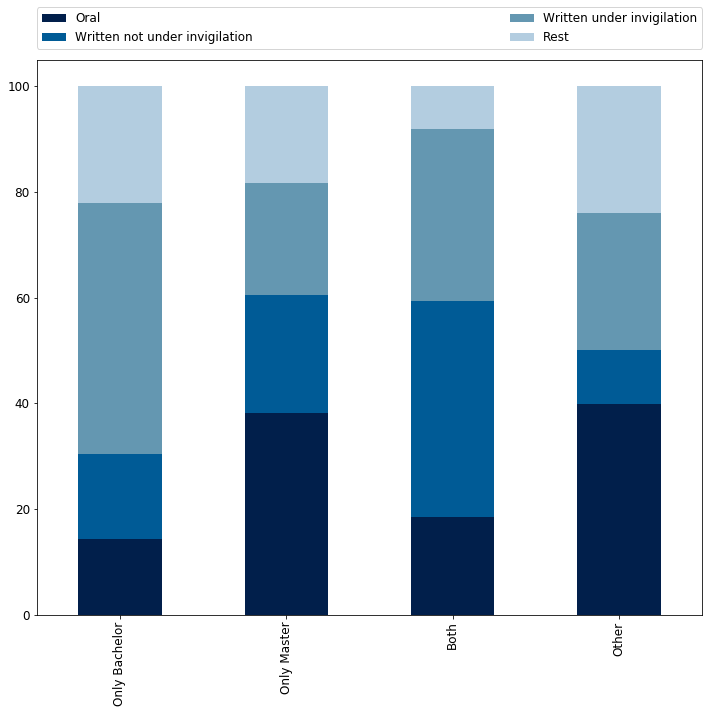

In [26]:
# Diagram of type of assessment
d = tlen_bygroup_weight('toa_edit','Level_edit')
di = {}
di['ID'] = ['Rest', 'Oral', 'Written not under invigilation', 'Written under invigilation']
for i in d.columns.unique():
    l = []
    for k in range(len(d['Master_only'])):
        l.append(d[i][k]/sum(d[i])*100)
    
    di[i] = l
    
dfcat = pd.DataFrame.from_dict(di).set_index('ID') 
dfcat = dfcat.rename(columns ={'Bachelor_only': 'Only Bachelor','Master_only':'Only Master'}).T.reindex(index =['Only Bachelor','Only Master','Both','Other'])[['Oral', 'Written not under invigilation', 'Written under invigilation','Rest']]

colors = ["#011f4b","#005b96","#6497b1",'#b3cde0']


dfcat.plot(kind='bar', stacked=True, color = colors, fontsize = 12)
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.rcParams["figure.figsize"] = [8,8]
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=2, fontsize = 12) #,weight = 'bold')
plt.tight_layout()
plt.savefig('mag_2stacked_bar_share_ass_level.png')


In [27]:
# Table of GPA by type of assesment and Level
print(w_mean_g(['Bachelor_only','Master_only','Both','Other'], df['toa_edit'].unique()).set_index('').to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Bachelor\_only &  Master\_only &      Both &     Other \\
                               &                &              &           &           \\
\midrule
Rest                           &       7.581014 &     8.756378 &  8.619758 &  8.430719 \\
Oral                           &       8.369963 &     9.262555 &  8.650164 &  8.361100 \\
Written not under invigilation &       7.658774 &     8.370590 &  8.240386 &  7.975831 \\
Written under invigilation     &       6.564404 &     7.184503 &  6.930722 &  6.714200 \\
\bottomrule
\end{tabular}



In [51]:
with open('df_final_outer-Copy1.pkl', 'rb') as f:
    dfo = pickle.load(f)

In [56]:
list(dfo.columns.unique())

['Kursus',
 'Fakultet',
 'Institut',
 'Termin',
 'ECTS',
 'Eksamenstype',
 'Antal tilmeldte',
 'Fremmødte',
 'Antal bestået',
 'Eksamensgennemsnit',
 12,
 10,
 7,
 4,
 2,
 0,
 -3,
 'Ej mødt',
 'Ikke bestået',
 'Year',
 'ID',
 'Re-exam_dummy',
 'URL_E',
 'level_0',
 'Course Name',
 'Credit',
 'Type of assessment',
 'Aid',
 'Marking scale',
 'Censorship form',
 'Exam period',
 'Re-exam',
 'Language',
 'Course code',
 'Level',
 'Duration',
 'Placement',
 'Schedule',
 'Study board',
 'Course id',
 'Category',
 'Lectures',
 'Preparation',
 'Exam',
 'Total',
 'Content',
 'Learning\r\nOutcome',
 'Class Instruction',
 'Practical exercises',
 'Exam registration requirements',
 'Field Work',
 'Course capacity',
 'Seminar',
 'Guidance',
 'Continuing and further education',
 'Price',
 'Class Seminar',
 'Class Exercises',
 'Study Groups',
 'Exercises',
 'Exam Preparation',
 'Excursions',
 'Øvelseshold',
 'Øvelser',
 'Course Preparation',
 'Theory exercises',
 'Project work',
 'Clinical practice',
 

In [88]:
dfo['URL_E'][6027]

'http://karakterstatistik.stads.ku.dk/Histogram/SMEA15031E/Winter-2018'

In [84]:
dfo[['URL_C','URL_E']][6000:]

,URL_C,URL_E
6000,https://kurser.ku.dk/archive/2017-2018/course/...,http://karakterstatistik.stads.ku.dk/Histogram...
6001,https://kurser.ku.dk/archive/2017-2018/course/...,http://karakterstatistik.stads.ku.dk/Histogram...
6002,https://kurser.ku.dk/archive/2017-2018/course/...,http://karakterstatistik.stads.ku.dk/Histogram...
6003,https://kurser.ku.dk/archive/2017-2018/course/...,http://karakterstatistik.stads.ku.dk/Histogram...
6004,https://kurser.ku.dk/archive/2016-2017/course/...,http://karakterstatistik.stads.ku.dk/Histogram...
6005,https://kurser.ku.dk/archive/2016-2017/course/...,http://karakterstatistik.stads.ku.dk/Histogram...
6006,https://kurser.ku.dk/archive/2016-2017/course/...,http://karakterstatistik.stads.ku.dk/Histogram...
6007,NaN,http://karakterstatistik.stads.ku.dk/Histogram...
6008,https://kurser.ku.dk/archive/2017-2018/course/...,http://karakterstatistik.stads.ku.dk/Histogram...
6009,https://kurser.ku.dk/archive/2017-2018/course/...,http://karakterstatistik.stads.ku.dk/Histogram...
